In [7]:
import imp
import numpy as np
import geopandas as gpd
import shapely.ops
import shapely.geometry
import pandas as pd
#import shapefile as shp
import matplotlib
import matplotlib.pyplot as plt
import os
import importlib
#imp.reload(AnalyzeLangs)
from AnalyzeLangs import find_perc, filter_perc_lang, find_dialects_perc, find_top_langs


#### 2011 Census districts with map geometry

In [89]:
mapPath = "C://Users/Owner/Desktop/Projects/Research/maps/Data/IndiaMaps/maps-master/Districts/"
df = gpd.read_file(mapPath + 'Census_2011/2011_Dist.shp')

#shf = shp.Reader(datapath + 'Census_2001/2001_Dist.shp')
display(df.head())
display(df.shape)

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


(641, 6)

### 2011 Language Data

In [90]:
DataPath = "C://Users/Owner/Desktop/Projects/Research/maps/Data/CleanData/"

d11 = pd.read_pickle(DataPath + "LangData2011.pkl")
#d01 = pd.read_pickle(DataPath + "LangData2001.pkl")

In [91]:
d11[d11["District"]>0].head()

,State,District,Tehsil,AreaName,LangGroup,LangGroupCode,LangName,LangCode,Total,Rural,Urban,StateName,DistrictName
10664,1,1,0,Kupwara_Jammu&Kashmir,Assamese,1000.0,Assamese,1002,618,340,278,Jammu&Kashmir,Kupwara_Jammu&Kashmir
10665,1,1,0,Kupwara_Jammu&Kashmir,Assamese,1000.0,Assamese_Other,1999,3,3,0,Jammu&Kashmir,Kupwara_Jammu&Kashmir
10667,1,1,0,Kupwara_Jammu&Kashmir,Bengali,2000.0,Bengali,2007,1750,1169,581,Jammu&Kashmir,Kupwara_Jammu&Kashmir
10669,1,1,0,Kupwara_Jammu&Kashmir,Bodo,3000.0,Bodo/Boro,3001,5,1,4,Jammu&Kashmir,Kupwara_Jammu&Kashmir
10671,1,1,0,Kupwara_Jammu&Kashmir,Dogri,4000.0,Dogri,4001,976,657,319,Jammu&Kashmir,Kupwara_Jammu&Kashmir


### Match the State Names in the two tables

In [92]:
States_cen = d11["StateName"].unique().tolist()
States_map = df["ST_NM"].unique().tolist()
States_cen.sort()
States_map.sort()
print(States_cen, States_map)
print(len(States_cen), len(States_map))

['Andaman&NicobarIslands', 'AndhraPradesh', 'ArunachalPradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra&NagarHaveli', 'Daman&Diu', 'Goa', 'Gujarat', 'Haryana', 'HimachalPradesh', 'India', 'Jammu&Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'MadhyaPradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'NctOfDelhi', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'TamilNadu', 'Tripura', 'UttarPradesh', 'Uttarakhand', 'WestBengal'] ['Andaman & Nicobar Island', 'Andhra Pradesh', 'Arunanchal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadara & Nagar Havelli', 'Daman & Diu', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'NCT of Delhi', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
36 35


In [93]:
data_names = ['Andaman&NicobarIslands' ,'AndhraPradesh', 'ArunachalPradesh', 'Assam',
 'Bihar', 'Chandigarh' ,'Chhattisgarh' ,'Dadra&NagarHaveli', 'Daman&Diu', 'Goa',
 'Gujarat' ,'Haryana' ,'HimachalPradesh', 'Jammu&Kashmir' ,'Jharkhand',
 'Karnataka' ,'Kerala', 'Lakshadweep', 'MadhyaPradesh', 'Maharashtra',
 'Manipur', 'Meghalaya' ,'Mizoram' ,'Nagaland' ,'NctOfDelhi', 'Odisha',
 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'TamilNadu', 'Tripura',
 'UttarPradesh', 'Uttarakhand', 'WestBengal']
map_names =['Andaman & Nicobar Island', 'Andhra Pradesh', 'Arunanchal Pradesh', 'Assam', 
            'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadara & Nagar Havelli', 'Daman & Diu', 
            'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 
            'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 
            'NCT of Delhi', 'Orissa', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
            'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
for i in range(len(data_names)):
    df.loc[df["ST_NM"]==map_names[i], "ST_NM"] = data_names[i]

#### Update distrct names to match data

In [94]:
df["DISTRICT"] = df['DISTRICT'].str.replace(' ', '')
df["DistrictName"] = df["DISTRICT"]+"_" +df["ST_NM"]

In [95]:
Dmap = df["DistrictName"].unique().tolist()
Dmap.sort()
Dtab = d11["DistrictName"][d11["District"]!=0].unique().tolist()
Dtab.sort()
print([d for d in Dmap if d not in Dtab])
print([d for d in Dtab if d not in Dmap])
print(len([d for d in Dmap if d not in Dtab]), len([d for d in Dtab if d not in Dmap]))

['Bauda_Odisha', 'Chamrajnagar_Karnataka', 'DataNotAvailable_Jammu&Kashmir', 'EastNimar_MadhyaPradesh', 'East_Sikkim', 'Garhchiroli_Maharashtra', 'Janjgir-champa_Chhattisgarh', 'Kaimur(bhabua)_Bihar', 'KansiramNagar_UttarPradesh', 'Lawangtlai_Mizoram', 'Leh(ladakh)_Jammu&Kashmir', 'Maharajganj_UttarPradesh', 'Marigaon_Assam', 'Nagappattinam_TamilNadu', 'Nicobar_Andaman&NicobarIslands', 'North24Parganas_WestBengal', 'North_Sikkim', 'PashchimMedinipur_WestBengal', 'RiBhoi_Meghalaya', 'SantRaviDasNagar(bhadohi)_UttarPradesh', 'Saraikela-kharsawan_Jharkhand', 'Saran(chhapra)_Bihar', 'SiddharthNagar_UttarPradesh', 'South24Parganas_WestBengal', 'South_Sikkim', 'Virudunagar_TamilNadu', 'WestNimar_MadhyaPradesh', 'West_Sikkim', 'Y.s.r._AndhraPradesh']
['Baudh_Odisha', 'Chamarajanagar_Karnataka', 'EastDistrict_Sikkim', 'Gadchiroli_Maharashtra', 'Janjgir-Champa_Chhattisgarh', 'Kaimur(Bhabua)_Bihar', 'KanshiramNagar_UttarPradesh', 'Khandwa(EastNimar)_MadhyaPradesh', 'Khargone(WestNimar)_MadhyaPra

In [96]:
map_names = ['Bauda_Odisha', 'Chamrajnagar_Karnataka', 'DataNotAvailable_Jammu&Kashmir', 
              'EastNimar_MadhyaPradesh', 'East_Sikkim', 'Garhchiroli_Maharashtra', 
              'Janjgir-champa_Chhattisgarh', 'Kaimur(bhabua)_Bihar', 'KansiramNagar_UttarPradesh', 
              'Lawangtlai_Mizoram', 'Leh(ladakh)_Jammu&Kashmir', 'Maharajganj_UttarPradesh', 
              'Marigaon_Assam', 'Nagappattinam_TamilNadu', 'Nicobar_Andaman&NicobarIslands', 
              'North24Parganas_WestBengal', 'North_Sikkim', 'PashchimMedinipur_WestBengal', 
              'RiBhoi_Meghalaya', 'SantRaviDasNagar(bhadohi)_UttarPradesh',
              'Saraikela-kharsawan_Jharkhand', 'Saran(chhapra)_Bihar', 'SiddharthNagar_UttarPradesh',
              'South24Parganas_WestBengal', 'South_Sikkim', 'Virudunagar_TamilNadu', 
              'WestNimar_MadhyaPradesh', 'West_Sikkim', 'Y.s.r._AndhraPradesh']

tab_names = [ 'Baudh_Odisha', 'Chamarajanagar_Karnataka', 'nan_Jammu&Kashmir', 
             'Khandwa(EastNimar)_MadhyaPradesh', 'EastDistrict_Sikkim', 'Gadchiroli_Maharashtra',
             'Janjgir-Champa_Chhattisgarh', 'Kaimur(Bhabua)_Bihar', 'KanshiramNagar_UttarPradesh',
              'Lawngtlai_Mizoram', 'Leh(Ladakh)_Jammu&Kashmir', 'Mahrajganj_UttarPradesh', 
             'Morigaon_Assam', 'Nagapattinam_TamilNadu',      'Nicobars_Andaman&NicobarIslands', 
             'NorthTwentyFourParganas_WestBengal', 'NorthDistrict_Sikkim', 'PaschimMedinipur_WestBengal',
              'Ribhoi_Meghalaya', 'SantRavidasNagar(Bhadohi)_UttarPradesh', 
             'Saraikela-Kharsawan_Jharkhand', 'Saran_Bihar', 'Siddharthnagar_UttarPradesh', 
             'SouthTwentyFourParganas_WestBengal','SouthDistrict_Sikkim', 'Virudhunagar_TamilNadu',
             'Khargone(WestNimar)_MadhyaPradesh','WestDistrict_Sikkim', 'Ysr_AndhraPradesh']

for i in range(len(tab_names)):
    print(i, map_names[i], tab_names[i])
    df.loc[df["DistrictName"]==map_names[i], "DistrictName"] = tab_names[i]

0 Bauda_Odisha Baudh_Odisha
1 Chamrajnagar_Karnataka Chamarajanagar_Karnataka
2 DataNotAvailable_Jammu&Kashmir nan_Jammu&Kashmir
3 EastNimar_MadhyaPradesh Khandwa(EastNimar)_MadhyaPradesh
4 East_Sikkim EastDistrict_Sikkim
5 Garhchiroli_Maharashtra Gadchiroli_Maharashtra
6 Janjgir-champa_Chhattisgarh Janjgir-Champa_Chhattisgarh
7 Kaimur(bhabua)_Bihar Kaimur(Bhabua)_Bihar
8 KansiramNagar_UttarPradesh KanshiramNagar_UttarPradesh
9 Lawangtlai_Mizoram Lawngtlai_Mizoram
10 Leh(ladakh)_Jammu&Kashmir Leh(Ladakh)_Jammu&Kashmir
11 Maharajganj_UttarPradesh Mahrajganj_UttarPradesh
12 Marigaon_Assam Morigaon_Assam
13 Nagappattinam_TamilNadu Nagapattinam_TamilNadu
14 Nicobar_Andaman&NicobarIslands Nicobars_Andaman&NicobarIslands
15 North24Parganas_WestBengal NorthTwentyFourParganas_WestBengal
16 North_Sikkim NorthDistrict_Sikkim
17 PashchimMedinipur_WestBengal PaschimMedinipur_WestBengal
18 RiBhoi_Meghalaya Ribhoi_Meghalaya
19 SantRaviDasNagar(bhadohi)_UttarPradesh SantRavidasNagar(Bhadohi)_UttarPra

In [98]:
df[df["DistrictName"].isin(tab_names)][["DISTRICT", "DistrictName"]]

,DISTRICT,DistrictName
63,Bauda,Baudh_Odisha
103,Chamrajnagar,Chamarajanagar_Karnataka
124,Y.s.r.,Ysr_AndhraPradesh
135,DataNotAvailable,nan_Jammu&Kashmir
166,East,EastDistrict_Sikkim
171,EastNimar,Khandwa(EastNimar)_MadhyaPradesh
192,Garhchiroli,Gadchiroli_Maharashtra
252,Janjgir-champa,Janjgir-Champa_Chhattisgarh
266,Kaimur(bhabua),Kaimur(Bhabua)_Bihar
280,KansiramNagar,KanshiramNagar_UttarPradesh


In [99]:
Dmap = df["DistrictName"].unique().tolist()
Dmap.sort()
Dtab = d11["DistrictName"][d11["District"]!=0].unique().tolist()
Dtab.sort()
print([d for d in Dmap if d not in Dtab])
print([d for d in Dtab if d not in Dmap])
print(len([d for d in Dmap if d not in Dtab]), len([d for d in Dtab if d not in Dmap]))

['nan_Jammu&Kashmir']
[]
1 0


#### Calculate % speakers for different dialects & languages

In [100]:
d11_ = find_perc(d11)
df_11 = d11_[d11_["District"]!=0]
#df_01["DISTRICT_01"] = df_01["DistrictName"]
df_11.shape
#d01_districts = d01[d01["Area Name"]==]

(46338, 25)

In [101]:
df_test = filter_perc_lang(df_11, "LangName", "Bengali",  "District")
df_test = df_test[~np.isnan(df_test["State"])]
df_plot = df.merge(df_test, on = "DistrictName", how = "outer")
df_plot[df_plot["ST_NM"]=="WestBengal"]

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,DistrictName,State,District,LangName,Total,Rural,Urban,Total_%,Rural_%,Urban_%
48,Bankura,WestBengal,19,13,339,"POLYGON ((87.71411 23.01057, 87.70942 23.01473...",Bankura_WestBengal,19.0,339.0,Bengali,3260949.0,2969386.0,291563.0,90.677380,90.078460,97.263532
54,Barddhaman,WestBengal,19,9,335,"POLYGON ((88.19771 23.76477, 88.19671 23.75623...",Barddhaman_WestBengal,19.0,335.0,Bengali,6167508.0,4254667.0,1912841.0,79.966102,91.747373,62.200527
87,Birbhum,WestBengal,19,8,334,"POLYGON ((87.89239 24.56390, 87.89278 24.55224...",Birbhum_WestBengal,19.0,334.0,Bengali,3235405.0,2819707.0,415698.0,92.388564,92.373421,92.491406
128,DakshinDinajpur,WestBengal,19,5,331,"POLYGON ((88.18542 25.28589, 88.18690 25.28782...",DakshinDinajpur_WestBengal,19.0,331.0,Bengali,1406222.0,1185600.0,220622.0,84.137046,82.600523,93.481918
133,Darjiling,WestBengal,19,1,327,"POLYGON ((88.75870 27.14800, 88.75812 27.14525...",Darjiling_WestBengal,19.0,327.0,Bengali,424366.0,184454.0,239912.0,23.089848,16.590216,33.042726
218,Haora,WestBengal,19,15,341,"MULTIPOLYGON (((87.99513 22.77300, 87.99747 22...",Haora_WestBengal,19.0,341.0,Bengali,4121879.0,1768313.0,2353566.0,84.999078,99.580798,76.574466
230,Hugli,WestBengal,19,12,338,"POLYGON ((88.41167 22.94525, 88.41310 22.93983...",Hugli_WestBengal,19.0,338.0,Bengali,4828443.0,3222388.0,1606055.0,87.524562,95.092777,75.472722
247,Jalpaiguri,WestBengal,19,2,328,"POLYGON ((89.86232 26.70367, 89.86679 26.70024...",Jalpaiguri_WestBengal,19.0,328.0,Bengali,2311369.0,1514273.0,797096.0,59.954425,54.138624,75.327000
305,KochBihar,WestBengal,19,3,329,"MULTIPOLYGON (((89.02623 26.51818, 89.03012 26...",KochBihar_WestBengal,19.0,329.0,Bengali,2672235.0,2410523.0,261712.0,94.816256,95.316884,90.441057
313,Kolkata,WestBengal,19,16,342,"POLYGON ((88.41075 22.55997, 88.40914 22.55744...",Kolkata_WestBengal,19.0,342.0,Bengali,2763206.0,0.0,2763206.0,61.470679,0.000000,61.470679


#### Filter data by language/ dialect and merge, then show prevalence of language/ dialect

In [102]:
def plot_lang_map(lang_name, 
                  lang_type="LangName", 
                  colorscheme ="Blues", 
                  State = "India", 
                  showStates = False,
                 outline = False):
    
    #lang_name = str(lang_name)
    df_test = filter_perc_lang(df_11, lang_type, lang_name, "District")
    df_test = df_test[~np.isnan(df_test["State"])]
    #df_test["DISTRICT"] = df_test["DistrictName"]
    df_plot = df.merge(df_test, on = "DistrictName", how = "outer")
    #display(df_plot.shape)
    #df_test.head()

    fig, ax = plt.subplots(figsize = (10,10))
    
    if (State == "India"):
        
        ax.set_title("Percentage distribution of "+str(lang_name)+" speakers, 2011")  
        df_plot.plot(column = 'Total_%', ax=ax, cmap = colorscheme,
                        legend = True, legend_kwds={'shrink': 0.3}, 
                        markersize = 10)
    
        if (showStates): 
        #darkest = matplotlib.colors.ListedColormap(colorscheme[10:,:-1])
            States = df_plot["ST_NM"].unique().tolist()
            for s in States:
                ls = shapely.ops.unary_union(df_plot["geometry"][df_plot["ST_NM"]==s]).boundary
                gpd.GeoSeries(ls).plot(edgecolor="grey", lw=1, linestyle = '--', alpha = 0.5, ax=ax)

        if (outline):
            ls = shapely.ops.unary_union(df_plot["geometry"]).boundary
            gpd.GeoSeries(ls).plot(edgecolor="grey", lw=1, linestyle = '--', alpha = 0.5, ax=ax)
            
    
    else:
        df_plot = df_plot[df_plot["ST_NM"]==State]  
        df_plot.plot(column = 'Total_%', ax=ax, cmap = colorscheme,
                        legend = True, legend_kwds={'shrink': 0.3}, 
                        markersize = 10)
        df_plot.boundary.plot(edgecolor="black", lw=0.5, linestyle = '--', ax=ax)
        ax.set_title("Percentage distribution of "+str(lang_name)+" speakers in " + State + ", 2011")

C:\Users\Owner\anaconda3\lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


CPU times: total: 406 ms
Wall time: 423 ms


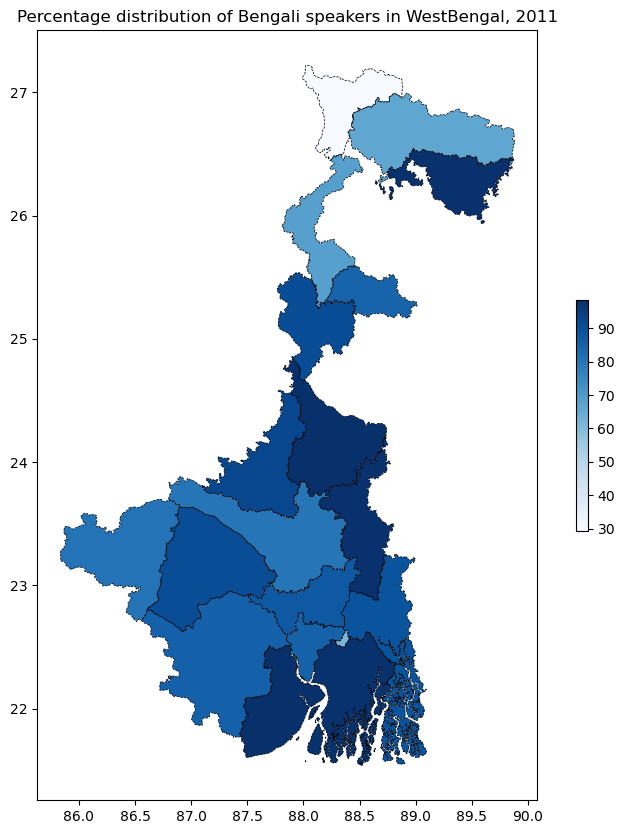

In [103]:
%%time
plot_lang_map("Bengali", 
              colorscheme = "Blues", 
              lang_type = "LangGroup", 
              State = "WestBengal", 
              showStates = False,
             outline = True
             )

#### Plot highest, second highest/ third highest language in any district...

In [104]:
def find_top_langs(df, lang_type, rank):
    import warnings
    warnings.filterwarnings("ignore")
    pv = df[["AreaName", lang_type, lang_type + "_Total_%"]].pivot_table(index = "AreaName", 
                                                                      columns = lang_type, 
                                                                     values =  lang_type +"_Total_%")
    pv = pv.rename_axis(None, axis=0)  
    #pv = pv.rename_axis(None, axis=1)  
    pv.columns.name = None
    pv.index.name =None
    pv = pv.fillna(0)
    pv.head()
    pv = pv.rank(ascending=False, method='first', axis=1)
    pv = pv.reset_index().melt(id_vars='index')

    pv1 = pv[pv['value'] == rank]
    pd.DataFrame ( pv1.groupby('index')['variable'].apply(list).reset_index())
    pv1["rank_"+str(rank)] = pv1["variable"]

    return pv1

In [110]:
def plot_mode_map(lang_type="LangName", 
                  rank = 1, 
                  State = "India", 
                  showStates = False,
                  outline = False,
                 showLegend = False):
    
    #lang_name = str(lang_name)
    df_test = find_top_langs(df_11, lang_type, rank)
    df_test["DistrictName"] = df_test["index"]
    df_plot = df.merge(df_test, on = "DistrictName", how = "outer")
    
    if rank==1:
        modeTitle = "Most spoken languages by district "
        
    if rank==2:
        modeTitle = "2nd most spoken languages by district "
        
    if rank==3:
        modeTitle = "3rd most spoken languages by district "
        
    if rank>3:
        modeTitle = str(rank)+"th most spoken languages by district "

    fig, ax = plt.subplots(figsize = (10,10))
    
    if (State == "India"):
        
        ax.set_title(modeTitle +", 2011") 
        ax.legend(loc="upper left")
        df_plot.plot(column = "rank_"+str(rank), categorical=True, cmap='Spectral', linewidth=.6, edgecolor='0.2',
         legend=showLegend, ax=ax)
    
        if (showStates): 
        #darkest = matplotlib.colors.ListedColormap(colorscheme[10:,:-1])
            States = df_plot["ST_NM"].unique().tolist()
            for s in States:
                ls = shapely.ops.unary_union(df_plot["geometry"][df_plot["ST_NM"]==s]).boundary
                gpd.GeoSeries(ls).plot(edgecolor="grey", lw=1, linestyle = '--', alpha = 0.5, ax=ax)

        if (outline):
            ls = shapely.ops.unary_union(df_plot["geometry"]).boundary
            gpd.GeoSeries(ls).plot(edgecolor="grey", lw=1, linestyle = '--', alpha = 0.5, ax=ax)
            
    
    else:
        
        df_plot = df_plot[df_plot["ST_NM"]==State]  
        df_plot.plot(column = "rank_"+str(rank), categorical=True, 
                     cmap='Spectral', linewidth=.6, edgecolor='0.2',
         legend=showLegend, legend_kwds={'bbox_to_anchor':(1.35, 0.95),'fontsize':10,'frameon':False},
         ax=ax)
        #ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
        #ax.legend(loc='lower center')
        df_plot.boundary.plot(edgecolor="black", lw=0.5, linestyle = '--', ax=ax)
        ax.set_title(modeTitle + State + ", 2011")

In [111]:
df["ST_NM"].unique()

array(['AndhraPradesh', 'UttarPradesh', 'Gujarat', 'Maharashtra',
       'Mizoram', 'Rajasthan', 'Kerala', 'MadhyaPradesh', 'Uttarakhand',
       'Haryana', 'Punjab', 'Jammu&Kashmir', 'ArunachalPradesh', 'Odisha',
       'Bihar', 'TamilNadu', 'Karnataka', 'Assam', 'WestBengal',
       'Chhattisgarh', 'HimachalPradesh', 'Manipur', 'Jharkhand',
       'NctOfDelhi', 'Chandigarh', 'Dadra&NagarHaveli', 'Daman&Diu',
       'Tripura', 'Nagaland', 'Sikkim', 'Meghalaya', 'Puducherry', 'Goa',
       'Andaman&NicobarIslands', 'Lakshadweep'], dtype=object)

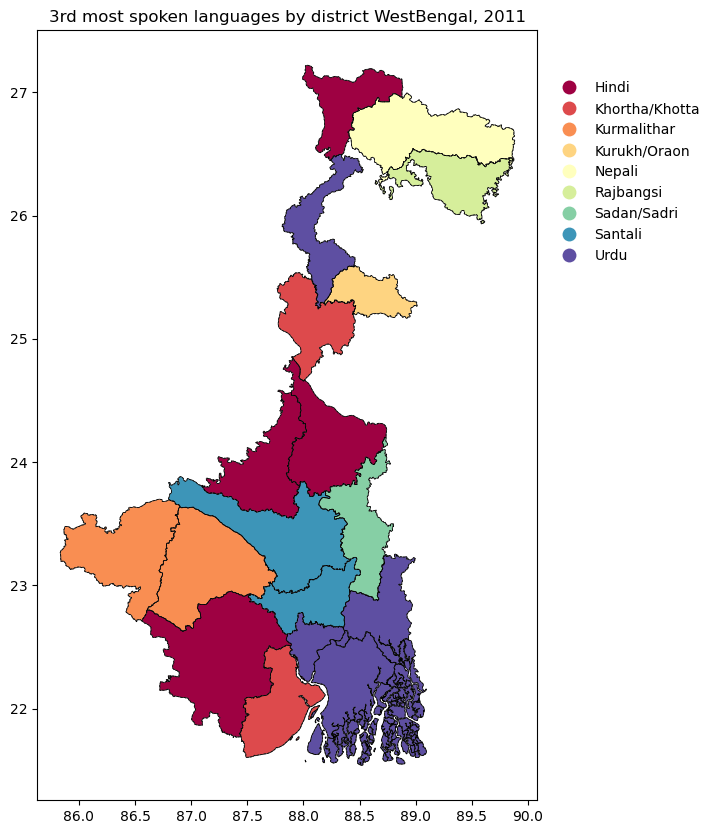

In [118]:
plot_mode_map  (lang_type="LangName", #LangName
                  rank = 3, 
                  State = "WestBengal", 
                  showStates = False,
                  outline = False,
               showLegend = True)

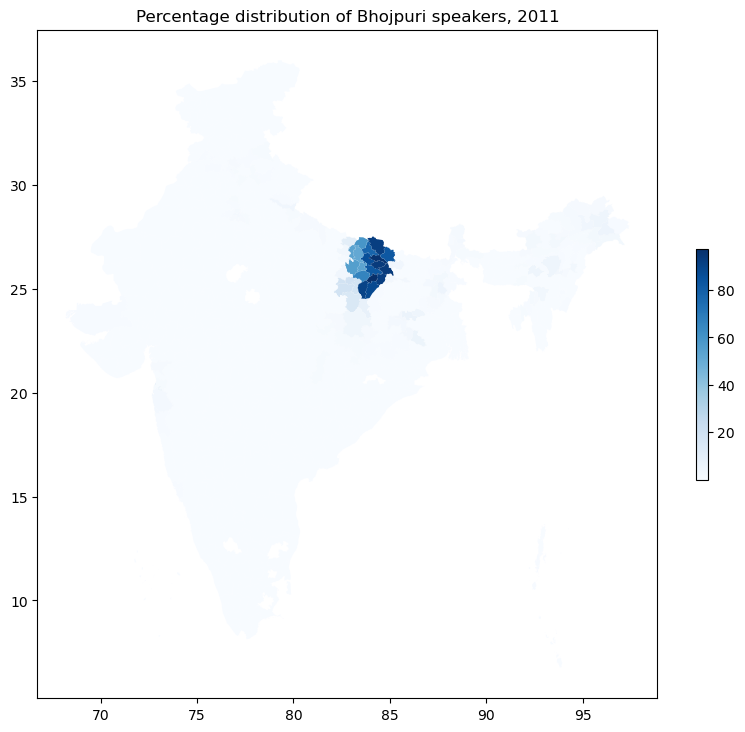

In [114]:
plot_lang_map("Bhojpuri")

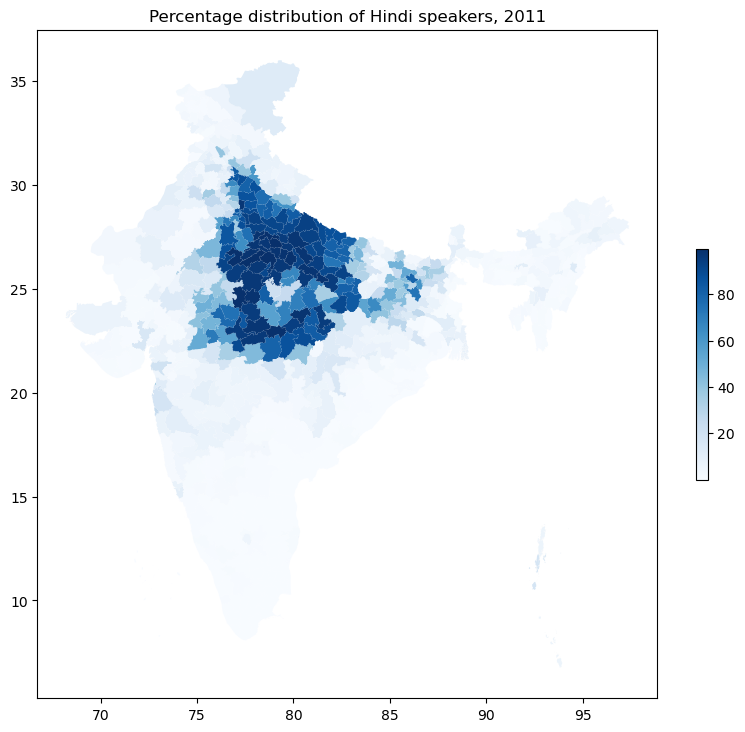

In [117]:
plot_lang_map("Hindi")

<Axes: title={'center': 'Percentage distribution of Hindi speakers, 2001'}>

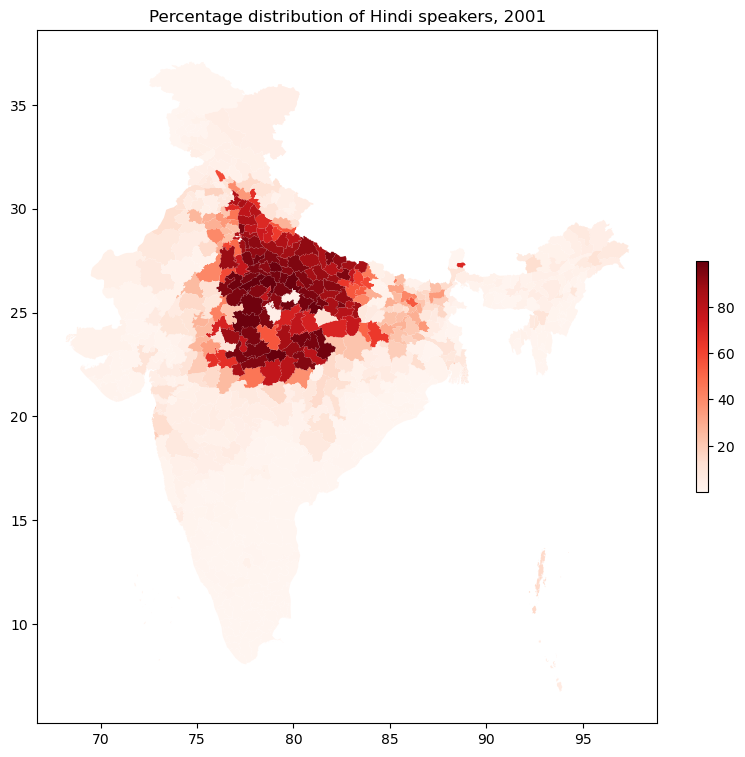

In [34]:
#df = df[~df["ST_NM"].isin(['Andaman & Nicobar Island',       'Lakshadweep'])]
#plt.figure(figsize = [12,12])


In [ ]:
#https://censusindia.gov.in/nada/index.php/catalog/22865/download/25996/PC01_C16_24.xls